In [1]:
from matplotlib import pyplot as plt
from utils import *
import promethee_functions as pf

## 1. Data preparation

In [2]:
data = read_data()
# le = life expectancy -> maximum is better
# gdi = gender development index -> maximum is better
# hdi = human development index -> maximum is better
# eys = expected years of schooling -> maximum is better
# poptotal = total population -> maximum is better
# co2prod = production of co2 -> minimum is better

# Select only 5 samples (the last 5)

# data = data.tail(5)
data.head()

,iso3,co2prod,hdi,le,gdi,eys,mys
1,ALB,"[1.675414089, 1.299241297, 0.761894326, 0.7083...","[0.649, 0.632, 0.616, 0.618, 0.623, 0.632, 0.6...","[73.144, 73.378, 73.715, 73.939, 74.131, 74.36...","[0.937, 0.934, 0.946, 0.935, 0.927, 0.917, 0.9...","[11.57933998, 11.78129959, 10.65800953, 10.073...","[7.354632085, 7.352753507, 7.350874929, 7.3489..."
6,ARG,"[3.434042462, 3.549403166, 3.611462427, 3.4612...","[0.724, 0.731, 0.736, 0.74, 0.746, 0.747, 0.75...","[71.784, 72.319, 72.43, 72.565, 73.172, 73.133...","[0.968, 0.97, 0.973, 0.981, 0.975, 0.973, 0.98...","[13.39248967, 13.35243988, 13.31250985, 13.272...","[8.126089428, 8.192950249, 8.260361195, 8.3277..."
8,AUS,"[16.31629816, 16.18508529, 16.29369992, 16.383...","[0.864, 0.866, 0.868, 0.873, 0.873, 0.882, 0.8...","[77.044, 77.483, 77.477, 78.01, 77.856, 78.262...","[0.962, 0.963, 0.963, 0.963, 0.964, 0.964, 0.9...","[17.4329358, 17.43243413, 17.43193246, 17.4314...","[11.22770758, 11.249762, 11.27181643, 11.29387..."
9,AUT,"[8.09602735, 8.479727909, 7.686215312, 7.67741...","[0.823, 0.826, 0.832, 0.836, 0.841, 0.847, 0.8...","[75.74, 75.793, 75.993, 76.226, 76.543, 76.777...","[0.939, 0.942, 0.944, 0.946, 0.949, 0.952, 0.9...","[13.84039021, 13.9349699, 14.23005962, 14.4188...","[10.20033055, 10.29016018, 10.3807809, 10.4714..."
11,BHS,"[7.47195017, 7.233624818, 6.626875623, 6.05245...","[0.76, 0.757, 0.762, 0.762, 0.765, 0.773, 0.77...","[70.133, 69.616, 70.668, 70.656, 70.851, 70.76...","[0.993, 1.005, 0.995, 0.995, 0.995, 1.0, 0.999...","[11.29223459, 11.30924636, 11.32628377, 11.343...","[10.01280022, 10.11538124, 10.21796227, 10.320..."


In [3]:
# Pass through the score functions
column = data["co2prod"]
score = pf.score_function(column, maximize=False)

data["co2prod"] = score

data.head()

,iso3,co2prod,hdi,le,gdi,eys,mys
1,ALB,"[31.730197210999997, 32.106370002999995, 32.64...","[0.649, 0.632, 0.616, 0.618, 0.623, 0.632, 0.6...","[73.144, 73.378, 73.715, 73.939, 74.131, 74.36...","[0.937, 0.934, 0.946, 0.935, 0.927, 0.917, 0.9...","[11.57933998, 11.78129959, 10.65800953, 10.073...","[7.354632085, 7.352753507, 7.350874929, 7.3489..."
6,ARG,"[29.971568837999996, 29.856208133999996, 29.79...","[0.724, 0.731, 0.736, 0.74, 0.746, 0.747, 0.75...","[71.784, 72.319, 72.43, 72.565, 73.172, 73.133...","[0.968, 0.97, 0.973, 0.981, 0.975, 0.973, 0.98...","[13.39248967, 13.35243988, 13.31250985, 13.272...","[8.126089428, 8.192950249, 8.260361195, 8.3277..."
8,AUS,"[17.089313139999998, 17.220526009999997, 17.11...","[0.864, 0.866, 0.868, 0.873, 0.873, 0.882, 0.8...","[77.044, 77.483, 77.477, 78.01, 77.856, 78.262...","[0.962, 0.963, 0.963, 0.963, 0.964, 0.964, 0.9...","[17.4329358, 17.43243413, 17.43193246, 17.4314...","[11.22770758, 11.249762, 11.27181643, 11.29387..."
9,AUT,"[25.309583949999997, 24.925883391, 25.71939598...","[0.823, 0.826, 0.832, 0.836, 0.841, 0.847, 0.8...","[75.74, 75.793, 75.993, 76.226, 76.543, 76.777...","[0.939, 0.942, 0.944, 0.946, 0.949, 0.952, 0.9...","[13.84039021, 13.9349699, 14.23005962, 14.4188...","[10.20033055, 10.29016018, 10.3807809, 10.4714..."
11,BHS,"[25.933661129999997, 26.171986481999998, 26.77...","[0.76, 0.757, 0.762, 0.762, 0.765, 0.773, 0.77...","[70.133, 69.616, 70.668, 70.656, 70.851, 70.76...","[0.993, 1.005, 0.995, 0.995, 0.995, 1.0, 0.999...","[11.29223459, 11.30924636, 11.32628377, 11.343...","[10.01280022, 10.11538124, 10.21796227, 10.320..."


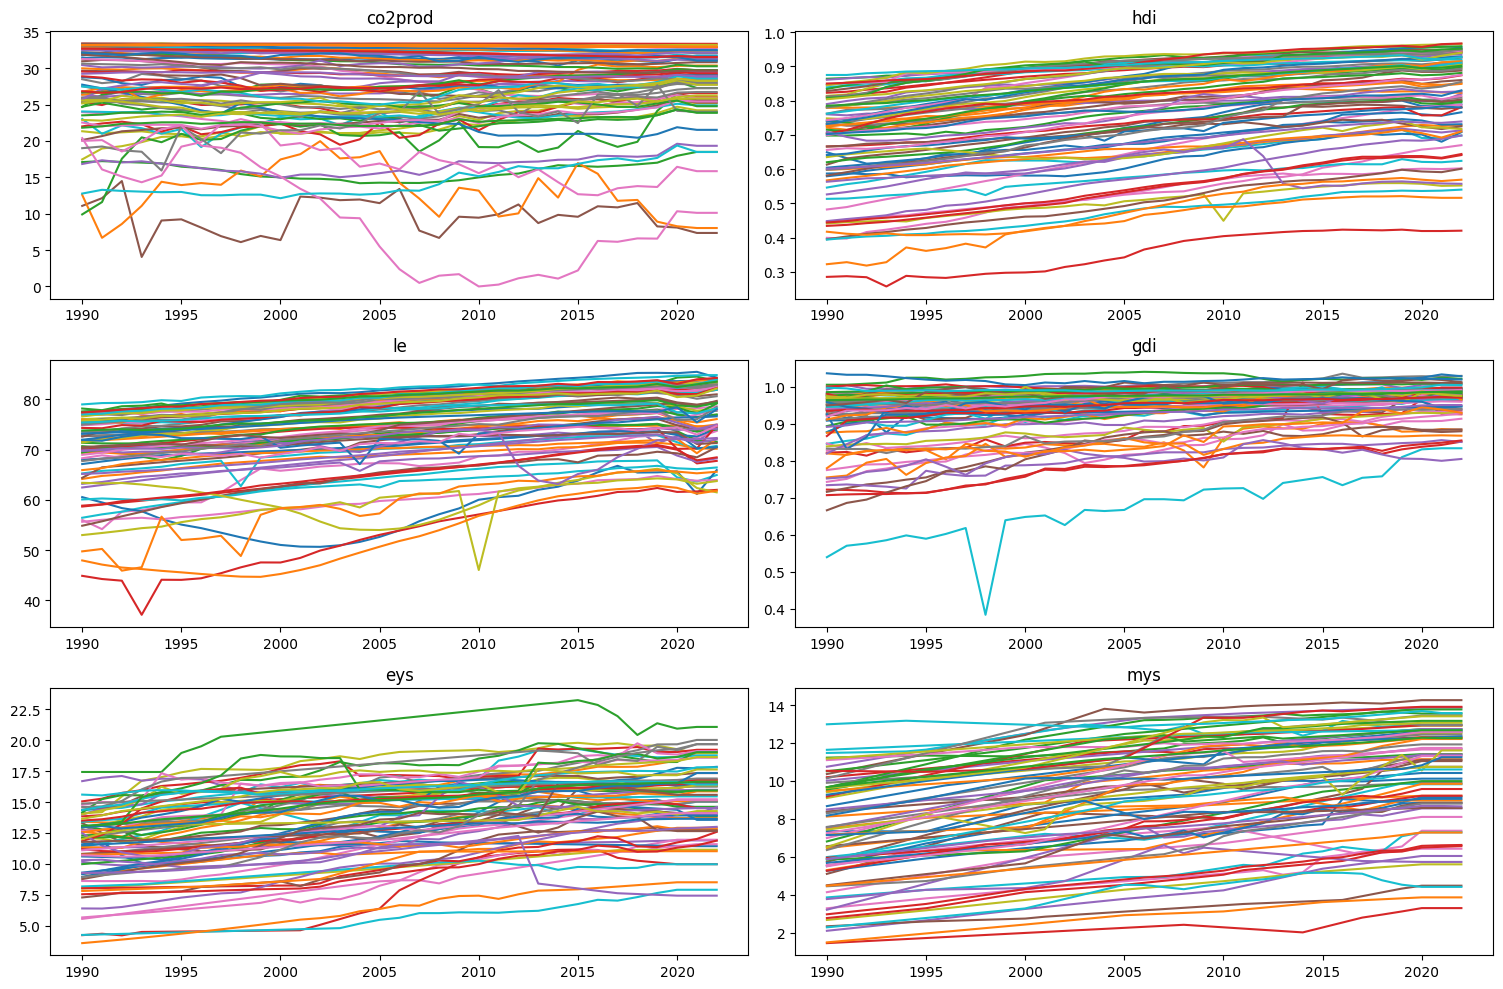

In [4]:
plot_data(data)

In [5]:
data = scale_data(data)
data.head()

,iso3,co2prod,hdi,le,gdi,eys,mys
1,ALB,"[0.950396884169162, 0.9616641778152939, 0.9777...","[0.5521126760563381, 0.5281690140845071, 0.505...","[0.7451000661594444, 0.7499379755210056, 0.756...","[0.8419452887537996, 0.8373860182370823, 0.855...","[0.40687220261117096, 0.41713826030745743, 0.3...","[0.46063936348922674, 0.46049254625201674, 0.4..."
6,ARG,"[0.897721670239787, 0.894266335471204, 0.89240...","[0.6577464788732394, 0.6676056338028169, 0.674...","[0.7169823023486604, 0.7280433344359908, 0.730...","[0.8890577507598785, 0.89209726443769, 0.89665...","[0.4990386478204085, 0.4970028276142586, 0.494...","[0.5209313693173578, 0.5261567690701549, 0.531..."
8,AUS,"[0.5118666566376268, 0.5157968024851811, 0.512...","[0.8549295774647887, 0.8577464788732394, 0.860...","[0.8257318888521336, 0.8348081376116442, 0.834...","[0.8799392097264438, 0.8814589665653496, 0.881...","[0.7044235418064759, 0.7043980408007824, 0.704...","[0.7633333392951344, 0.7650569669606708, 0.766..."
9,AUT,"[0.7580838393704943, 0.746591070721671, 0.7703...","[0.7971830985915492, 0.8014084507042253, 0.809...","[0.7987719153159113, 0.7998676811114789, 0.804...","[0.844984802431611, 0.8495440729483282, 0.8525...","[0.5218064318631579, 0.5266141285825015, 0.541...","[0.6830403426148914, 0.6900608326324437, 0.697..."
11,BHS,"[0.7767764747615993, 0.7839149009886129, 0.802...","[0.7084507042253522, 0.7042253521126761, 0.711...","[0.6828481640754217, 0.6721592788620576, 0.693...","[0.9270516717325229, 0.945288753799392, 0.9300...","[0.392277994894812, 0.3931427411296456, 0.3940...","[0.6683842117841926, 0.6764012661447674, 0.684..."


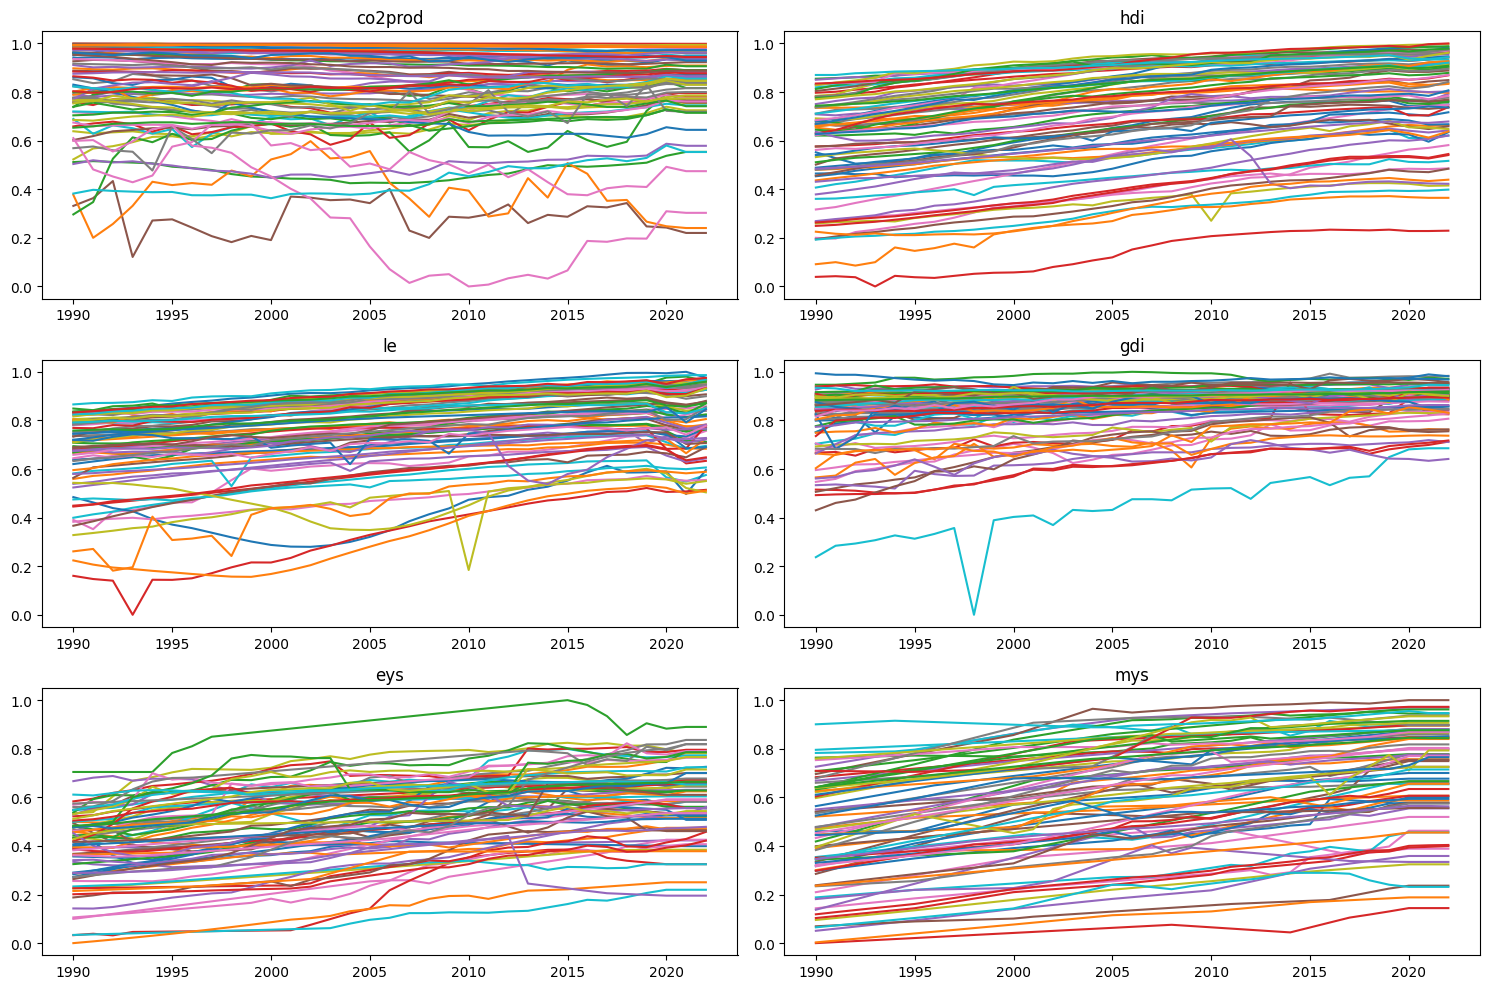

In [6]:
plot_data(data, legend=False)

## 2 Applying Promethee

In [7]:
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series
N = data.shape[0] # Number of time series
K = data.columns.shape[0] -1 # Number of features/criteria

W = [1/K for _ in range(K)]
P = [0.90 for _ in range(K)]
Q = [0.1 for _ in range(K)]

In [8]:
criterias = data.columns[1:]
alternatives = data["iso3"].values
print(criterias)
print(alternatives)

Index(['co2prod', 'hdi', 'le', 'gdi', 'eys', 'mys'], dtype='object')
['ALB' 'ARG' 'AUS' 'AUT' 'BHS' 'BHR' 'BGD' 'BRB' 'BEL' 'BOL' 'BWA' 'BRN'
 'BGR' 'BDI' 'CAN' 'CHL' 'CHN' 'CYP' 'CZE' 'DNK' 'DOM' 'EGY' 'EST' 'FIN'
 'FRA' 'DEU' 'GHA' 'GRC' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN'
 'IRL' 'ISR' 'ITA' 'JPN' 'KOR' 'MLT' 'MUS' 'MEX' 'MAR' 'NPL' 'NLD' 'NZL'
 'NOR' 'PAK' 'PRY' 'PHL' 'POL' 'PRT' 'ROU' 'LCA' 'SAU' 'SGP' 'ZAF' 'ESP'
 'LKA' 'SDN' 'SWE' 'CHE' 'SYR' 'THA' 'TTO' 'TUR' 'GBR' 'USA' 'URY' 'ZMB'
 'ZZA.VHHD' 'ZZI.SA' 'ZZK.WORLD']


In [9]:
phi_c_all = pf.get_all_Phi_c(data, P, Q)

mins = min([x.min() for x in phi_c_all])

print(mins)
print(len(phi_c_all))
print(phi_c_all[0].shape)

c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\promethee_functions.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


-0.9039472603302392
6
(75, 33)


### PROMETHEE II

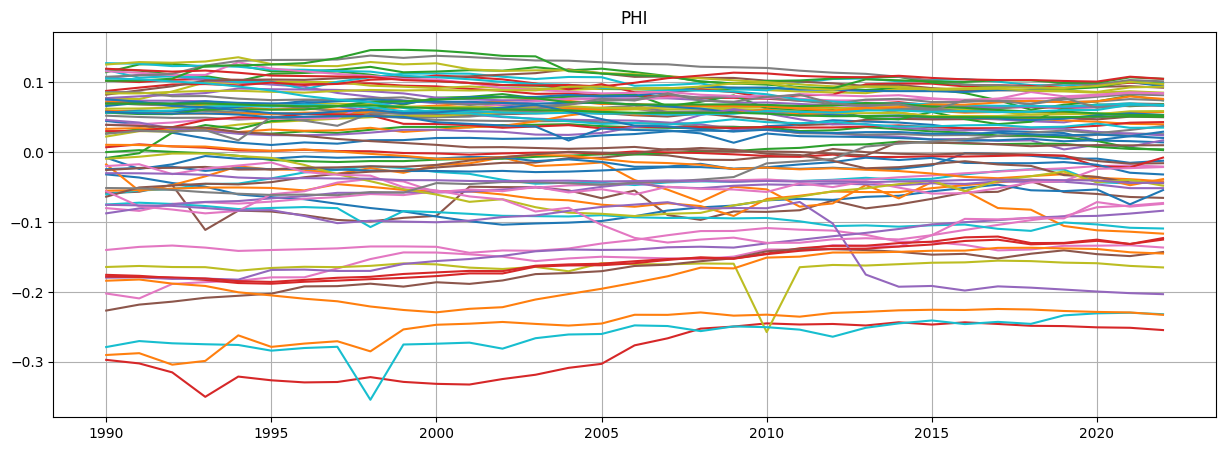

In [11]:
PHI = pf.PHI_all(phi_c_all, W, N, L, K)

plot_PHI(PHI, alternatives, labels=False)

### PROMETHEE gamma

In [13]:
gamma = pf.get_gamma_matrix(data, phi_c_all, W)

gamma.min()

np.float64(0.0)

In [13]:
# plot_gammas(gamma, alternatives)

#### Create a preference matrix for each instant


In [15]:
T_I = 0.1 # Threshold for the indifference
T_J = T_I # Threshold for the incomparability
P_F = 1 # Global preference factor

In [16]:
def get_3_matrices_for_pref_matrix(gamma, P_f, T_I, T_J):
    """
    Get the 3 matrices for the preference matrix
    - pre-preference matrix: P(ai, aj, t)= (gamma(ai, aj, t) - gamma(aj, ai, t)) / P_f
    - indifference matrix: I(ai, aj, t) = T_I - max(gamma(ai, aj, t), gamma(aj, ai, t))
    - incomparability matrix: J(ai, aj, t) = min(gamma(ai, aj, t), gamma(aj, ai, t)) - T_J
    """
    P = np.zeros(gamma.shape)
    I = np.zeros(gamma.shape)
    J = np.zeros(gamma.shape)
    for i in range(gamma.shape[0]): # Iterate through a_i
        for j in range(gamma.shape[1]): # Iterate through a_j
            if i !=j:
                P[i,j] = (gamma[i,j] -gamma[j,i]) / P_f
                for t in range(gamma.shape[2]):
                    I[i,j,t] = T_I - max(gamma[i,j,t], gamma[j,i,t])
                    J[i,j,t] = min(gamma[i,j,t], gamma[j,i,t]) - T_J
    return P, I, J

P, I, J = get_3_matrices_for_pref_matrix(gamma, P_F, T_I, T_J)

In [17]:
def get_preference_matrix(gamma):
    """
    Get the preference matrix from the gamma matrix
    - Preference matrix Pref_Mat(ai, aj) = P or I or J (represented as 0, 1, 2)
    - If I(ai, aj, t) > max(J(ai, aj, t), P(ai, aj, t), P(aj, ai, t)) then Pref_Mat(ai, aj) = I
    - If J(ai, aj, t) > max(I(ai, aj, t), P(ai, aj, t), P(aj, ai, t)) then Pref_Mat(ai, aj) = J
    - If P(ai, aj, t) > max(I(ai, aj, t), J(ai, aj, t), P(aj, ai, t)) then Pref_Mat(ai, aj) = P
    - If P(aj, ai, t) > max(I(ai, aj, t), J(ai, aj, t), P(ai, aj, t)) then Pref_Mat(ai, aj) = P
    """
    P, I, J = get_3_matrices_for_pref_matrix(gamma, P_F, T_I, T_J)
    Pref_Mat = np.zeros(gamma.shape)

    for i in range(gamma.shape[0]): # Iterate through a_i
        for j in range(gamma.shape[1]):
            if i != j:
                for t in range(gamma.shape[2]):
                    if I[i,j,t] > max(J[i,j,t], P[i,j,t], P[j,i,t]):
                        Pref_Mat[i,j,t] = 1
                    elif J[i,j,t] > max(I[i,j,t], P[i,j,t], P[j,i,t]):
                        Pref_Mat[i,j,t] = 2
                    elif P[i,j,t] > max(I[i,j,t], J[i,j,t], P[j,i,t]):
                        Pref_Mat[i,j,t] = 0
                    elif P[j,i,t] > max(I[i,j,t], J[i,j,t], P[i,j,t]):
                        Pref_Mat[i,j,t] = 0
    return Pref_Mat

Pref_Mat = get_preference_matrix(gamma)   

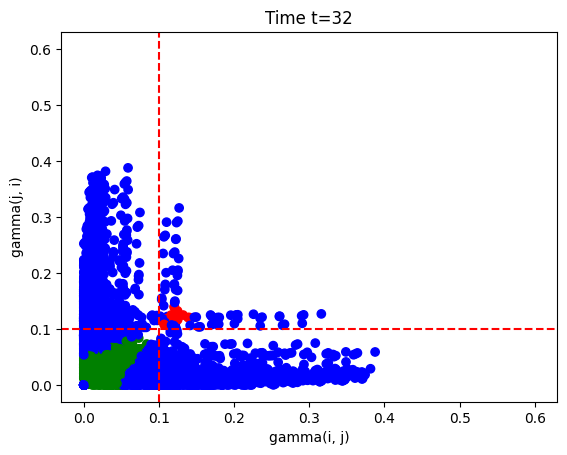

In [18]:
def plot_gamma_values(gamma, pref_mat, T_I, T_J):
    """ 
    Plot the gamma values on a plot
    - x-axis: gamma(i, j)
    - y-axis: gamma(j, i)
    - color: pref_mat(i, j) - 0: P, 1: I, 2: J
    
    Make it move through time
    """
    def colors(x):
        if x == 0:
            return "blue" # P
        elif x == 1:
            return "green" # I
        else:
            return "red" # J

    fig, ax = plt.subplots()

    scatter = ax.scatter(gamma[:, :, 0].flatten(), gamma[:, :, 0].T.flatten(), c=[colors(x) for x in pref_mat[:, :, 0].flatten()])
    ax.axhline(y=T_I, color='r', linestyle='--')
    ax.axvline(x=T_I, color='r', linestyle='--')
    ax.set_xlabel("gamma(i, j)")
    ax.set_ylabel("gamma(j, i)")
    ax.axhline(y=0.6, color='w', linestyle='--')
    ax.axvline(x=0.6, color='w', linestyle='--')

    def update(t):
        ax.clear()
        scatter = ax.scatter(gamma[:, :, t].flatten(), gamma[:, :, t].T.flatten(), c=[colors(x) for x in pref_mat[:, :, t].flatten()])
        ax.set_xlabel("gamma(i, j)")
        ax.set_ylabel("gamma(j, i)")
        ax.axhline(y=T_I, color='r', linestyle='--')
        ax.axvline(x=T_I, color='r', linestyle='--')
        ax.axhline(y=0.6, color='w', linestyle='--')
        ax.axvline(x=0.6, color='w', linestyle='--')
        ax.set_title("Time t={}".format(t))
        return scatter,
    
    ani = FuncAnimation(fig, update, frames=range(gamma.shape[2]), blit=True)
    ani.save("../output/gamma_values.gif", writer="pillow")

plot_gamma_values(gamma, Pref_Mat, T_I, T_J)
